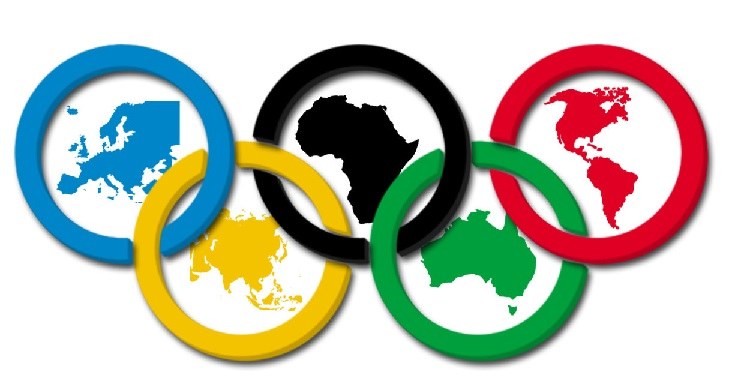

# Final Project: Olympic success factors

#### Anirudh Dave (ad4183@stern.nyu.edu)
#### Jackie Wong (jw1743@stern.nyu.edu)

December 21, 2018

### Background

The first modern Summer Olympic Games were held on April 6, 1986 in Athens, Greece, with athletes from 14 nations who competed in 43 events. The first Winter Olympics were held on January 25, 1924 in Chamonix, France, with 16 nations that competed in 16 events. Fast forward to the 2016 Summer Olympic Games, which had 206 nations that competed in 306 events; and in the 2018 Winter Olympic Games, 92 nations competed in 102 events. 

The modern Olympic Games are an international sporting events in which thousands of athletes represent their nation from around the world to compete against one another to be an Olympic champion. The Olympics is the largest sporting event in the world, where the winner and its nation is recognized on a global platform. The number of medals a country has won in the Olympics, is a way of signifying a nation's strength, culture, and national pride. 

### Objective

This project's goal is join the Olympics dataset to the World Development Indicators (WDI) Dataset and find insights about a country's success in the Olympics based on the WDI dataset . The indicators we will be exploring are a nation's success based on Male and Female Life expectancy, GDP, GDP growth, and population.

1. USA Female Life Expectancy and USA Gold Medals

2. USA and Russia/Soviet Union Olympic Medal success during and after Cold War

3. BRIC Olympic success before and after 2000.


### Data Sources
The datasets that will be used in this project comes from the following sources:

1) [120 years of Olympic history](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results): This is a Kaggle dataset where the scraped data originated from www.sports-reference.com. This dataset provides information dating back to the first modern Olympic Games from Athens 1896 to Rio 2016. It includes detailed information on nations' athletes such as gender, age, events participated, and medals won.


2) [World Development Indicator](http://datatopics.worldbank.org/world-development-indicators): This is a World Bank dataset starting from 1960 with information on nations' people, economy, poverty, inequality, environment. The key indicators that we will be focusing on is Male and Female Life expectancy, GDP, GDP growth and population. (This is a Kaggle Data Set where the original data set is from www.worldbank.com)


**Importing Packages**

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### **Organizing Data**

First we start by loading the Olympic and Work Bank dataset. In order to merge the two sets of data we must locate the common identifier found in both datasets. In the case of the World Bank and Olympics, the common identifiers are the 'Country Code' and 'NOC' in their respective datasets, as well as the 'Year'.  To make it consistent we will alter the name of certain columns and make them consistent by changing World Bank's 'CountryCode' to 'NOC'.

In [2]:
###Loading the primary data sets##
#df1 = pd.read_csv('C:/Users/jacki/Google Drive/NYU Stern/Fall 2018/Data Bootcamp/Project/WDIDATA.csv', dtype = 'unicode')
#df2 = pd.read_csv('C:/Users/jacki/Google Drive/NYU Stern/Fall 2018/Data Bootcamp/Project/athlete_events.csv', dtype = 'unicode')
df1 = pd.read_csv('C:/Users/aniru/Desktop/WDIDATA_OLYMPICS.csv', dtype = 'unicode')
df2 = pd.read_csv('C:/Users/aniru/Desktop/athlete_events.csv', dtype = 'unicode')

#Renaming the required column for consistency####
df1= df1.rename(columns = {'CountryCode':'NOC'})

In [3]:
#printing column names of WDI dataset
list(df1)

['CountryName', 'NOC', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']

In [4]:
#Exploring the World Bank WDI dataset
df1.head()

,CountryName,NOC,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1950,76.65
1,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1950,5.99
2,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1950,70.42
3,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1950,50.8
4,Arab World,ARB,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1950,25.6


In [5]:
#printing column names of Olympic dataset
list(df2)

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [6]:
#Exploring the Olympics dataset
df2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Now we want to start merging the data from the World Development Indicators that may help us identify trends related to a nation's success in the Olympics. The indicators we merge from the World Bank dataframe to the Olympic dataframe are the following: Total Life Expectancy,  Male Life expectancy, Female Life expectancy, GDP per capita,  GDP growth per capita %, and total population. A left join is used to join columns of the datasets 

In [7]:
#Subseting and merging total life expectancy data#
lifeexpectancytotal = df1[df1['IndicatorCode'] == 'SP.DYN.LE00.IN']
lifeexpectancytotal = lifeexpectancytotal[['NOC','Year','Value']]
lifeexpectancytotal = lifeexpectancytotal.rename(columns = {'Value':'LifeExpectancyTotal'})
df2 = pd.merge(df2,lifeexpectancytotal, how = 'left', on = ['NOC','Year'])

#Subseting and merging female life expectancy data#
lifeexpectancyfemale = df1[df1['IndicatorCode'] == 'SP.DYN.LE00.FE.IN']
lifeexpectancyfemale = lifeexpectancyfemale[['NOC','Year','Value']]
lifeexpectancyfemale = lifeexpectancyfemale.rename(columns = {'Value':'LifeExpectancyFemale'})
df2 = pd.merge(df2,lifeexpectancyfemale, how = 'left', on = ['NOC','Year'])

#Subseting and merging male life expectancy data#
lifeexpectancymale = df1[df1['IndicatorCode'] == 'SP.DYN.LE00.MA.IN']
lifeexpectancymale = lifeexpectancymale[['NOC','Year','Value']]
lifeexpectancymale = lifeexpectancymale.rename(columns = {'Value':'LifeExpectancyMale'})
df2 = pd.merge(df2,lifeexpectancymale, how = 'left', on = ['NOC','Year'])

#Subsetting and merging GDP per capita#
gdppercapita = df1[df1['IndicatorCode'] == 'NY.GDP.PCAP.CD']
gdppercapita = gdppercapita[['NOC','Year','Value']]
gdppercapita = gdppercapita.rename(columns = {'Value':'GdpPerCapita'})
df2 = pd.merge(df2,gdppercapita, how = 'left', on = ['NOC','Year'])

#Subsetting and merging GDP per Capita Percentage#
gdppercapitapercentage = df1[df1['IndicatorCode'] == 'NY.GDP.PCAP.KD.ZG']
gdppercapitapercentage = gdppercapitapercentage[['NOC','Year','Value']]
gdppercapitapercentage = gdppercapitapercentage.rename(columns = {'Value':'GdpPerCapitaPercentage'})
df2 = pd.merge(df2,gdppercapitapercentage, how = 'left', on = ['NOC','Year'])

#Subsetting and merging Population total#
populationtotal = df1[df1['IndicatorCode'] == 'SP.POP.TOTL']
populationtotal = populationtotal[['NOC','Year','Value']]
populationtotal = populationtotal.rename(columns = {'Value':'PopulationTotal'})
df2 = pd.merge(df2,populationtotal, how = 'left', on = ['NOC','Year'])

Since there is a lot of missing data from the World Bank prior to 1950, we will only look at data from 1950 and onward for both Datasets

In [8]:
# Changing the data type of the year column
df2.Year = pd.to_numeric(df2['Year'])
df1.Year.min()

'1950'

In [9]:
df2 = df2[(df2.Year) >= 1950]

In [10]:
df2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,LifeExpectancyTotal,LifeExpectancyFemale,LifeExpectancyMale,GdpPerCapita,GdpPerCapitaPercentage,PopulationTotal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,69.59,71.39,67.95,366.46,12.82,1164970000
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,75.6,77.18,74.15,6337.88,7.33,1350695000
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We continue to describe the dataset by doing a little exploratory analysis. 

In [11]:
print('Total number of countries participating since 1950: ' +str(len(df2.NOC.unique())))

Total number of countries participating since 1950: 225


In [12]:
print('Total number of countries particiapating in 1950: '+ str(len(df2.loc[(df2.Year) == 1952, 'NOC'].unique())))

Total number of countries particiapating in 1950: 69


In [13]:
print('Total number of countries particiapating in 2016: '+ str(len(df2.loc[(df2.Year) == 2016, 'NOC'].unique())))

Total number of countries particiapating in 2016: 207


In [14]:
print('Total number of participants since 1950:'+str(len(df2.Name.unique())))

Total number of participants since 1950:110361


In [15]:
print('Total number of participants in 1952: '+ str(len(df2.loc[(df2.Year) == 1952, 'Name'].unique())))

Total number of participants in 1952: 5621


In [16]:
print('Total number of participants in 2016: '+ str(len(df2.loc[(df2.Year) == 2016, 'Name'].unique())))

Total number of participants in 2016: 11174


In [17]:
print('Total number of sports since 1950: '+str(len(df2.Sport.unique())))

Total number of sports since 1950: 51


In [18]:
print('Total Sports since 1950:')
x = pd.DataFrame(df2.Sport.unique())
x.columns = ['Sports']
x

Total Sports since 1950:


,Sports
0,Basketball
1,Judo
2,Speed Skating
3,Cross Country Skiing
4,Ice Hockey
5,Swimming
6,Badminton
7,Sailing
8,Biathlon
9,Gymnastics


In [19]:
print('Total number of Sports in 1952: '+ str(len(df2.loc[(df2.Year) == 1952, 'Sport'].unique())))

Total number of Sports in 1952: 27


In [20]:
print('Total number of Sports in 2016: '+ str(len(df2.loc[(df2.Year) == 2016, 'Sport'].unique())))

Total number of Sports in 2016: 34


In [21]:
df2.Age = pd.to_numeric(df2.Age)
print('Average Age of Particiapants since 1950: '+ str(df2.Age.mean()))
print('Average Age of Particiapants in 1950: '+ str(df2.loc[(df2.Year) == 1952,'Age'].mean()))
print('Average Age of Particiapants in 2016: '+ str(df2.loc[(df2.Year) == 2016,'Age'].mean()))

Average Age of Particiapants since 1950: 25.040514463681486
Average Age of Particiapants in 1950: 26.161546085232903
Average Age of Particiapants in 2016: 26.20791934541204


In [22]:
# changing the data types of all the columns and describing the data
df2.LifeExpectancyFemale = pd.to_numeric(df2.LifeExpectancyFemale)
df2.LifeExpectancyTotal = pd.to_numeric(df2.LifeExpectancyTotal)
df2.LifeExpectancyMale = pd.to_numeric(df2.LifeExpectancyMale)
df2.GdpPerCapita = pd.to_numeric(df2.GdpPerCapita)
df2.GdpPerCapitaPercentage = pd.to_numeric(df2.GdpPerCapitaPercentage)
df2.PopulationTotal = pd.to_numeric(df2.PopulationTotal)

df2.describe(include='all')


#categorical values are showing as NaN

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,LifeExpectancyTotal,LifeExpectancyFemale,LifeExpectancyMale,GdpPerCapita,GdpPerCapitaPercentage,PopulationTotal
count,224864,224864,224864,222834.000000,202827,202115,224864,224864,224864,224864.000000,224864,224864,224864,224864,30476,159642.000000,159642.000000,159642.000000,142225.000000,136063.000000,1.630370e+05
unique,111056,110361,2,NaN,95,220,671,225,34,NaN,2,34,51,501,3,NaN,NaN,NaN,NaN,NaN,NaN
top,89187,Takashi Ono,M,NaN,180,70,United States,USA,2000 Summer,NaN,Summer,Sydney,Athletics,Football Men's Football,Bronze,NaN,NaN,NaN,NaN,NaN,NaN
freq,32,33,153047,NaN,11912,9308,13009,13579,13821,NaN,179664,13821,30449,4275,10385,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,25.040514,NaN,NaN,NaN,NaN,NaN,1989.173892,NaN,NaN,NaN,NaN,NaN,72.865773,76.031539,69.843942,16362.409596,2.918685,1.011621e+08
std,NaN,NaN,NaN,5.557395,NaN,NaN,NaN,NaN,NaN,18.738511,NaN,NaN,NaN,NaN,NaN,7.183698,7.350514,7.190110,17036.985916,3.810756,2.303642e+08
min,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,1952.000000,NaN,NaN,NaN,NaN,NaN,28.100000,29.870000,26.430000,59.470000,-22.550000,1.003300e+04
25%,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,1972.000000,NaN,NaN,NaN,NaN,NaN,69.700000,73.200000,66.510000,2643.900000,1.030000,1.010715e+07
50%,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN,73.830000,77.180000,70.750000,9522.770000,2.830000,3.626460e+07
75%,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,77.690000,81.000000,74.880000,25492.950000,4.630000,6.437499e+07


### **Understanding Data**

### 1. USA Female Life Expectancy

Does female life expectancy in the USA have an affect on the the number of US gold medals won? We will check to see if there is substantial difference between the percentage of gold medals won when the female life expectancy for that year is greater or lower than the average life expectancy.

#### Observe US female olympic Gold medal win percentage when life expectancy is greater than average life expectancy since 1950

Text(0,0.5,'Life Expectancy')

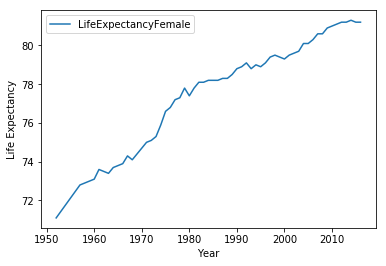

In [23]:
#Taking filter of USA and changing the type of life expectancy
df3 = df2[(df2.NOC) == 'USA']
df3.LifeExpectancyFemale = pd.to_numeric(df3['LifeExpectancyFemale'])
df3

#life expectancy female of USA
x = lifeexpectancyfemale[lifeexpectancyfemale['NOC'] == 'USA']
del x['NOC']
x = x.drop_duplicates()
x = x.reset_index()
del x['index']
x.LifeExpectancyFemale = pd.to_numeric(x['LifeExpectancyFemale'])
x.Year = pd.to_numeric(x['Year'])
x.plot(x = 'Year', y = 'LifeExpectancyFemale')
plt.ylabel('Life Expectancy')

The life expectancy of females in the USA is seen to be increasing since 1950

In [24]:
averageLEF = x.LifeExpectancyFemale.mean()
averageLEF

77.7

The average US female life expectancy since 1950 has been 77.7 years old. Now we want to look at the number of US Olympic female athletes who participated in the Summer games and when female life expectancy was greater than the US female average life expectancy. We will also look at the number of US female gold medals won when life expectancy was greater than average.

Text(0.5,1,'US Women gold medals in Olympic Games')

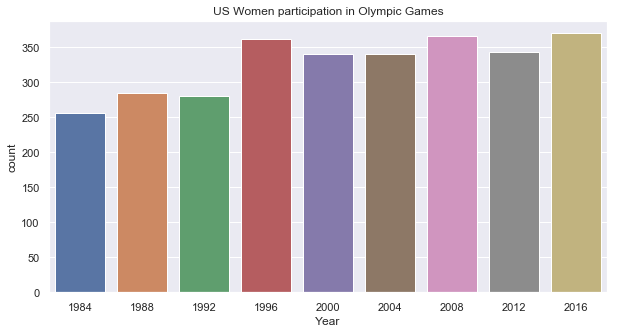

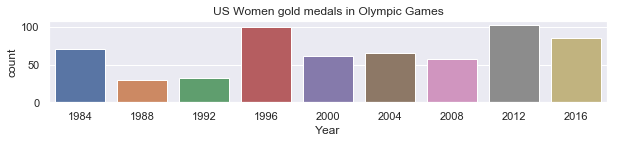

In [25]:
#US female participation when life expectancy was above average
womenInOlympics_Participation = df3[(df3.Sex == 'F') & (df3.Season == 'Summer') & (df3.LifeExpectancyFemale  > averageLEF)]
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.countplot(x='Year', data=womenInOlympics_Participation)
plt.title('US Women participation in Olympic Games')

#US female gold medals when life expectancy was above average
womenInOlympics_Gold = df3[(df3.Sex == 'F') & (df3.Season == 'Summer') & (df3.Medal == 'Gold') & (df3.LifeExpectancyFemale  > averageLEF)]
sns.set(style="darkgrid")
plt.figure(figsize=(10, 1.5))
sns.countplot(x='Year', data=womenInOlympics_Gold)
plt.title('US Women gold medals in Olympic Games')

In [26]:
print('Total US Women Participation: ' + str(len(womenInOlympics_Participation)))
print('Total US Women Gold Medals Won: ' + str(len(womenInOlympics_Gold )))
print('US Women Gold Win %: '+ str((len(womenInOlympics_Gold)/len(womenInOlympics_Participation))*100)[:5])

Total US Women Participation: 2939
Total US Women Gold Medals Won: 605
US Women Gold Win %: 20.58


When US female life expectancy was above 77.7 years of age, we identified a total of 2,939 US female athletes participations, from which they won a total of 605 gold medals. On average when US life expectancy is greater than the average since 1950, the US would win gold medals in female games 20.59% of the time.

#### Observe US female Olympic Gold medal win percentage when life expectancy is below the average life expectancy since 1950

Text(0.5,1,'US Women gold medals in Olympic Games')

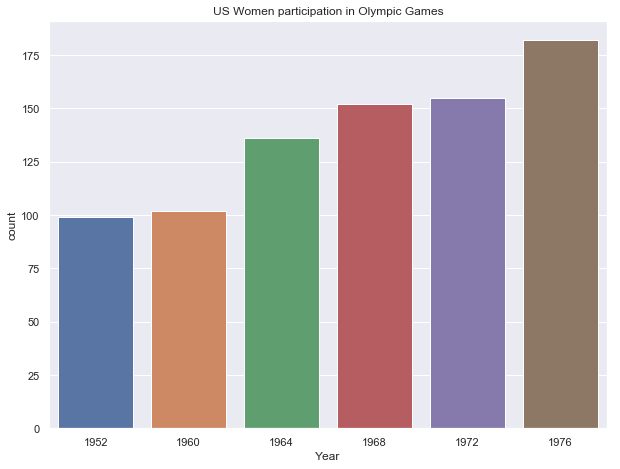

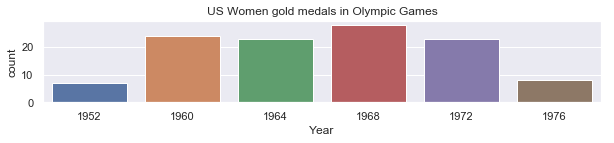

In [27]:
#participation when life expectancy was below average
womenInOlympics1_Participation = df3[(df3.Sex == 'F') & (df3.Season == 'Summer') & (df3.LifeExpectancyFemale  < averageLEF)]
sns.set(style="darkgrid")
plt.figure(figsize=(10, 7.5))
sns.countplot(x='Year', data=womenInOlympics1_Participation)
plt.title('US Women participation in Olympic Games')

#gold medals when life expectancy was below average
womenInOlympics1_Gold = df3[(df3.Sex == 'F') & (df3.Season == 'Summer') & (df3.Medal == 'Gold') & (df3.LifeExpectancyFemale  < averageLEF)]
sns.set(style="darkgrid")
plt.figure(figsize=(10, 1.5))
sns.countplot(x='Year', data=womenInOlympics1_Gold)
plt.title('US Women gold medals in Olympic Games')

In [28]:
print('Total US Women PArticipation: ' + str(len(womenInOlympics1_Participation)))
print('Total US Women Gold Medals Won: ' + str(len(womenInOlympics1_Gold )))
print('US Women Gold Win %: '+ str((len(womenInOlympics1_Gold)/len(womenInOlympics1_Participation))*100)[:5])

Total US Women PArticipation: 826
Total US Women Gold Medals Won: 113
US Women Gold Win %: 13.68


When US female life expectancy was below 77.7 years of age, since 1950 we identified a total of 826 participations from US female athletes, from which they won a total of 113 gold medals. When US life expectancy is below the average life expectancy since 1950, the US females would win gold medals 13.68% of the time.

### 2. United States versus Russia

We will be observing the changes in win percentages when nations are in a state of political hostility towards each other. Specifically we will be looking at the difference in Olympic performance of the Soviet Union and United States during and post Cold War.

 #### Looking at Medals won

To organize and visualise the data better we make the Olympic data more specific and take a look at the top 10 countries with the most amount of medals. This will clearly show that USA and Russia (including data from Soviet Union) have won the most amount of Olympic medals.

In the table below, we realise that the USA and Soviet (URS) have the highest tally of medals won till date. Russia (RUS) is at 5th position, which much higher than the other 14 countries that the Soviet broke up into.


In [29]:
####Top 10 countries with the most OLympic medals####
medals = df2.dropna(subset=['Medal'])
counted = medals.pivot_table(index='NOC', values='Name', columns='Medal', aggfunc='count')
counted['totals'] = counted.sum(axis='columns')
counted = counted.sort_values('totals', ascending=False)
counted.head(10)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,915.0,1878.0,1178.0,3971.0
URS,689.0,1082.0,732.0,2503.0
GER,563.0,545.0,490.0,1598.0
AUS,498.0,333.0,429.0,1260.0
RUS,399.0,389.0,360.0,1148.0
ITA,410.0,331.0,374.0,1115.0
CAN,335.0,349.0,350.0,1034.0
GDR,281.0,397.0,327.0,1005.0
CHN,292.0,350.0,347.0,989.0


The Soviet Union (URS) was dissolved into 15 independent countries on December 25, 1991. The fifteen countries are: Armenia, Azerbaijan, Belorussia (see Belarus), Estonia, Georgia, Kazakhstan, Kirghizia (see Kyrgyzstan), Latvia, Lithuania, Moldavia (see Moldova), Russia, Tadzhikistan (see Tajikistan), Turkmenistan, Ukraine, and Uzbekistan.

In the table below we have a list of the number of Olympic medals won by the 15 countries that made up the Soviet Union post-Cold War.  Clearly Russia led the pact in total Olympic Medals won.

In [30]:
URS_ALL = medals[medals['NOC'].isin(['RUS','ARM','AZE','BLR','EST','GEO','KAZ','KGZ','LAT','LTU','MDA','TJK','TKM','UKR','UZB'])]
counted = URS_ALL.pivot_table(index='NOC', values='Name', columns='Medal', aggfunc='count')
counted['totals'] = counted.sum(axis='columns')
counted = counted.sort_values('totals', ascending=False)
counted

Medal,Bronze,Gold,Silver,totals
NOC,,,,
RUS,399.0,389.0,360.0,1148.0
UKR,100.0,47.0,52.0,199.0
BLR,71.0,24.0,44.0,139.0
KAZ,32.0,20.0,25.0,77.0
LTU,48.0,6.0,7.0,61.0
AZE,25.0,7.0,12.0,44.0
UZB,17.0,10.0,7.0,34.0
GEO,18.0,8.0,6.0,32.0
LAT,12.0,3.0,17.0,32.0


We created a graph to clearly show the changes in the Olympic medals won by the 15 countries that made up the Soviet Union before and after it broke up in 1991.
We clearly see a large decline in wins after the Cold War ended for the Soviet countries.

Text(0.5,1,'URS before and after break up of Soviet Union')

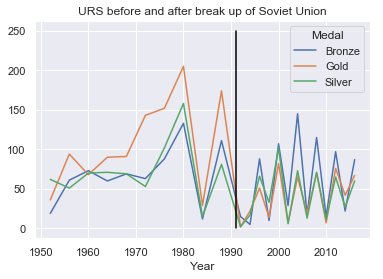

In [31]:
URS = medals[medals.NOC == 'URS']
af = URS_ALL.pivot_table(index='Year', values='Name', columns='Medal', aggfunc='count')
bf = URS.pivot_table(index='Year', values='Name', columns='Medal', aggfunc='count')
frames = [bf,af]
pd.concat(frames).plot()
plt.plot((1991, 1991), (0, 250), 'black')
plt.title('URS before and after break up of Soviet Union')

With Russia leading the pact of Olympic Medal wins over the other post-Soviet Union nations, we will analyze how Russia has done compared to the USA.

Below we have table and graph of the Olympic medals United States, Soviet Union, and Russa have won since 1950. We can tell that the Soviet Union were much more successful at winning medals in both the Summer and Winter Olympics than the USA. 

We did find an anomaly where the United States did not win any medals during the 1980 Summer Olympics and where the Soviet Union did not win any medals during the 1984 Summer Olympics. Upon further research, We found out the 1980 Summer Olympics were held in Moscow and the 1984 Summer Olympics were held in Los Angeles. Both nations boycotted each others Summer Olympics based on the location, because of the Cold War. 

After the break up of the Soviet Union we can see that the USA was very dominant over Russia in the Summer Olympic Games and on average USA was more successful during the Winter Olympic Games.

NOC       USA           URS           RUS       
Season Summer Winter Summer Winter Summer Winter
Year                                            
1952    134.0   30.0  117.0    NaN    NaN    NaN
1956    123.0   26.0  169.0   37.0    NaN    NaN
1960    125.0   27.0  169.0   42.0    NaN    NaN
1964    169.0    8.0  174.0   47.0    NaN    NaN
1968    166.0    7.0  192.0   37.0    NaN    NaN
1972    171.0   24.0  214.0   45.0    NaN    NaN
1976    164.0   11.0  286.0   56.0    NaN    NaN
1980      NaN   30.0  442.0   54.0    NaN    NaN
1984    352.0    9.0    NaN   56.0    NaN    NaN
1988    207.0    7.0  300.0   66.0    NaN    NaN
1992    224.0   14.0    NaN    NaN    NaN    NaN
1994      NaN   19.0    NaN    NaN    NaN   36.0
1996    259.0    NaN    NaN    NaN  115.0    NaN
1998      NaN   34.0    NaN    NaN    NaN   52.0
2000    242.0    NaN    NaN    NaN  187.0    NaN
2002      NaN   84.0    NaN    NaN    NaN   38.0
2004    263.0    NaN    NaN    NaN  189.0    NaN
2006      NaN   52.0

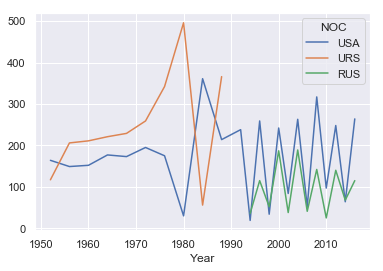

In [32]:
y = medals.pivot_table(index = 'Year', values='Name', columns=['NOC','Season'], aggfunc='count')
M = medals.pivot_table(index = 'Year', values='Name', columns='NOC', aggfunc='count')
M[['USA','URS','RUS']].plot()
print(y[['USA','URS','RUS']])

#### Looking at GDP
Now we look at GDP per capita in USA, Soviet Union, and Russia and see the difference during and after the Cold War.

From the data shown below we can see that GDP for USA grows at a steady pace since 1950. However, shortly after the Cold War, Russia's GDP decreases dramatically and eventually starts to increase exponentially after 1999. However after 2013, it's GDP starts to drop off again. 

Text(0.5,1,'GDP per capita comparison')

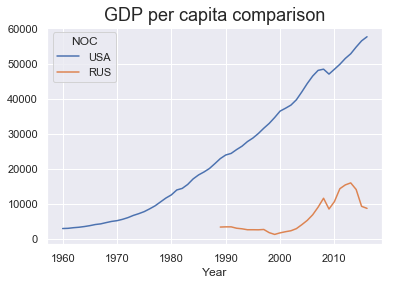

In [33]:
g = gdppercapita.reset_index()
del g['index']
g.Year = pd.to_numeric(g['Year'])
g1= g.pivot_table(index = 'Year', values='GdpPerCapita', columns='NOC', aggfunc='sum')
g1.USA = pd.to_numeric(g1['USA'])
g1.RUS = pd.to_numeric(g1['RUS'])
g1[['USA','RUS']].plot()
plt.title("GDP per capita comparison", fontsize = 18)


In [34]:
#printing the GDP per capita for each year in the US and Russia

# the world bank does not have any data for Soviet Union's GDP per capita 
g1[['USA','RUS']]

NOC,USA,RUS
Year,,
1960,3007.12,NaN
1961,3066.56,NaN
1962,3243.84,NaN
1963,3374.52,NaN
1964,3573.94,NaN
1965,3827.53,NaN
1966,4146.32,NaN
1967,4336.43,NaN
1968,4695.92,NaN


We will now look at changes in the population between USA and Russia. 

From the graph below, you will notice that the USA has seen somewhat of an exponential population growth since 1950. Russia on the other hand sees a much slower growth in population and its growth levels off after the mid 1990s.

Text(0.5,1,'Population comparison year over year')

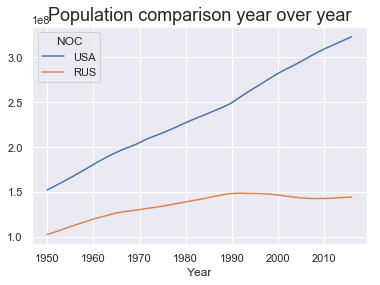

In [35]:
p = populationtotal.reset_index()
del p['index']
p.Year = pd.to_numeric(p['Year'])
p1= p.pivot_table(index = 'Year', values='PopulationTotal', columns='NOC', aggfunc='sum')
p1.USA = pd.to_numeric(p1['USA'])
p1.RUS = pd.to_numeric(p1['RUS'])
p1[['USA','RUS']].plot()
plt.title("Population comparison year over year", fontsize = 18)

Below are three graphs to help clearly distinguish the number of Gold, Silver, and Bronze Medals by USA, USSR, and Russia(post USSR).

The Union of Soviet Socialist Republics were very successful during the Olympics as a combined organization of 15 republics. Since 1950s we can clearly see the Soviet Union's dominance in the Olympics compared to USA's success. 

Post Soviet Union, Russia did show a slight upward trend in Olympic medal wins, however the drop in Olympic Medal wins may have correlated with drop in oil prices in 2014 and economic sanctions against Russia.

The United States of America have seen a growth in Olympic wins. They did see a slow growth in Olympic Medal wins and started to stay relatively steady after in 21st century. The large drop in medals won in 1980 is attributed to the USA not participating in the 1980 Summer Olympics in Moscow. Also the upward large spike in medals won in 1984, would be attributed to the fact that Russia did not participate in the 1984 Summer Olympics in Los Angelos. 

There is clearly a large shift in medals won when one of the two nations ,USA or Russia, do not participate in the Olympics. This is a good indicatior that USA and Russia are  most likely close competitors in many of the Olympic events.

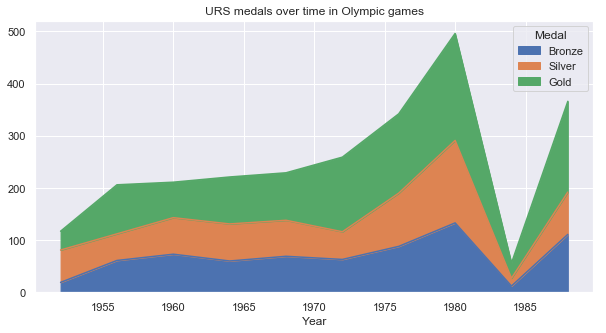

In [36]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

urs = medals[medals.NOC == 'URS']
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
urs_medals_by_year = urs.groupby(['Year', 'Medal'])['Name'].count()
urs_medals_by_year = urs_medals_by_year.unstack(level='Medal')
# Plot the DataFrame usa_medals_by_year
urs_medals_by_year.plot.area(figsize=(10,5), title='URS medals over time in Olympic games')
plt.show()

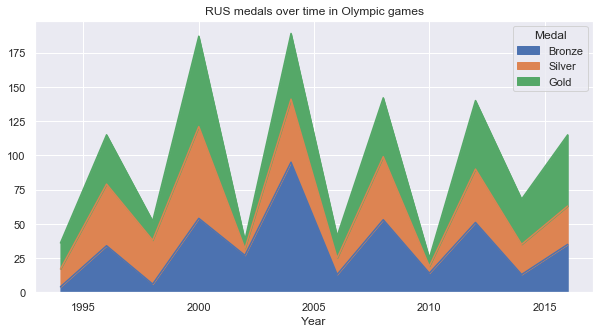

In [37]:
rus = medals[medals.NOC == 'RUS']
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
rus_medals_by_year = rus.groupby(['Year', 'Medal'])['Name'].count()
rus_medals_by_year = rus_medals_by_year.unstack(level='Medal')
# Plot the DataFrame usa_medals_by_year
rus_medals_by_year.plot.area(figsize=(10,5), title='RUS medals over time in Olympic games')
plt.show()


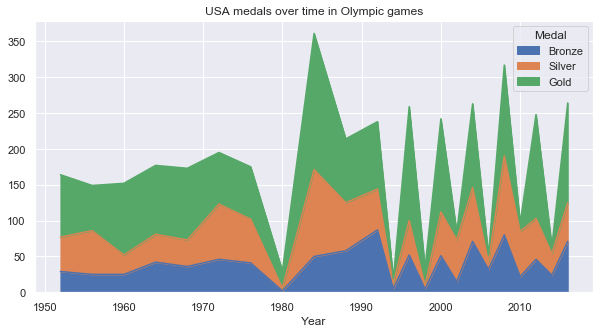

In [38]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Year', 'Medal'])['Name'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot.area(figsize=(10,5), title='USA medals over time in Olympic games')
plt.show()

### 3. BRIC Comparison

The BRIC countries refer to Brazil, Russia, India, and China. These countries were all grouped together in 2001, because they were considered to be at a similar stage of newly advanced economic development. We are going to look at the BRIC countries' performance before and after the year 2000, because the most economic growth of BRIC countries occured in the 21st century. 

#### BRIC Olympic medals performance difference

We will compare the Olympic medals won by BRIC countries from 1990 to 1999 and from 2000 to 2016. 

In [39]:
#BRIC countries performance between 1990 and 2000
bric0 = df2[(df2.Year < 2000) & (df2.Year >= 1990)]
bric0['Medal'].fillna('Participation Only', inplace=True)
ind_medals = bric0[(bric0.NOC == 'BRA') | (bric0.NOC == 'RUS') | (bric0.NOC == 'IND') | (bric0.NOC == 'CHN')].pivot_table(index=['NOC'], columns='Medal', values='Name', aggfunc='count', dropna=True, fill_value=0, margins=True)
ind_medals_sort = ind_medals.sort_values('All', ascending=False)
ind_medals_sort['Medals_Total'] = ind_medals_sort.Gold + ind_medals_sort.Silver + ind_medals_sort.Bronze 
print('BRIC countries accoring to Olympic medals won and participation from 1990 to 1999:')
ind_medals_sort[['Gold','Silver','Bronze','Participation Only','All', 'Medals_Total']]


BRIC countries accoring to Olympic medals won and participation from 1990 to 1999:


Medal,Gold,Silver,Bronze,Participation Only,All,Medals_Total
NOC,,,,,,
All,124,234,131,2127,2616,489
CHN,37,128,43,829,1037,208
RUS,69,90,44,754,957,203
BRA,18,16,43,425,502,77
IND,0,0,1,119,120,1


In [40]:
bric = df2[df2.Year >= 2000]
bric['Medal'].fillna('Participation Only', inplace=True)
ind_medals = bric[(bric.NOC == 'BRA') | (bric.NOC == 'RUS') | (bric.NOC == 'IND') | (bric.NOC == 'CHN')].pivot_table(index=['NOC'], columns='Medal', values='Name', aggfunc='count', dropna=True, fill_value=0, margins=True)
ind_medals_sort_1 = ind_medals.sort_values('All', ascending=False)
ind_medals_sort_1['Medals_Total'] = ind_medals_sort_1.Gold + ind_medals_sort_1.Silver + ind_medals_sort_1.Bronze 
print('BRIC countries accoring to Olympic medals won and participation from 2000 to 2016:')
ind_medals_sort_1[['Gold','Silver','Bronze','Participation Only','All', 'Medals_Total']]

BRIC countries accoring to Olympic medals won and participation from 2000 to 2016:


Medal,Gold,Silver,Bronze,Participation Only,All,Medals_Total
NOC,,,,,,
All,686,571,631,7428,9316,1888
RUS,320,270,355,2960,3905,945
CHN,283,190,182,2475,3130,655
BRA,82,107,86,1552,1827,275
IND,1,4,8,441,454,13


In [41]:
med1 = round((ind_medals_sort.loc['All','Medals_Total']/ind_medals_sort.loc['All','All'])*100,2)
med2 = round((ind_medals_sort_1.loc['All','Medals_Total']/ind_medals_sort_1.loc['All','All'])*100,2)
print("The percentage of medals earned by BRIC countries between 1990 to 1999: " + str(med1) + ' %')
print("The percentage of medals earned by BRIC countries between 2000 to 2016: " + str(med2) + ' %')
print("The percentage of medals increase: " + str(round(med2 - med1, 2)) + ' %')
print("The participation rate by BRIC countries increased by "+ str(round(ind_medals_sort_1.loc['All','All']/ind_medals_sort.loc['All','All'],2)), ' times.')

The percentage of medals earned by BRIC countries between 1990 to 1999: 18.69 %
The percentage of medals earned by BRIC countries between 2000 to 2016: 20.27 %
The percentage of medals increase: 1.58 %
The participation rate by BRIC countries increased by 3.56  times.


#### Average GDP of BRIC before and after 2000

We will compare BRIC countries GDP from 1990 to 1999 and from 2000 to 2016. There is a definitive uptrend in the BRIC countries GDP. Every country has experienced more than 200% growth when comparing average GDP before and after 2000. China has seen the largest growth from an average GDP per capita of 555 to 4041, an amazing growth of 728% in average GDP per capita. India has the lowest average GDP per capita compared to the other BRIC countries.

In [42]:
### GDP per capita before 2000
gdppercapita['Year'] = pd.to_numeric(gdppercapita['Year'])
bric0 = gdppercapita[(gdppercapita['Year'] < 2000) & (gdppercapita['Year'] >= 1990)]
bric0['GdpPerCapita'].fillna('0', inplace=True)
bric0.GdpPerCapita = pd.to_numeric(bric0['GdpPerCapita'])
avg_bric0 = bric0.groupby(['NOC'])['GdpPerCapita'].mean().reset_index(name='Average_GdpPerCapita')
avg_bric01 = avg_bric0[(avg_bric0.NOC == 'BRA') | (avg_bric0.NOC == 'RUS') | (avg_bric0.NOC == 'IND') | (avg_bric0.NOC == 'CHN')].sort_values('Average_GdpPerCapita', ascending=False)
avg_bric01 = avg_bric01.reset_index()
del avg_bric01['index']
print('The average GDP Per Capita of BRIC Countries: ' + str(avg_bric01['Average_GdpPerCapita'].mean()))
avg_bric01

The average GDP Per Capita of BRIC Countries: 1898.30625


,NOC,Average_GdpPerCapita
0,BRA,3974.659
1,RUS,2687.148
2,CHN,567.104
3,IND,364.314


In [43]:
###gdp per capita after 2000
gdppercapita['Year'] = pd.to_numeric(gdppercapita['Year'])
bric = gdppercapita[(gdppercapita['Year'] >= 2000)]
bric['GdpPerCapita'].fillna('0', inplace=True)
bric.GdpPerCapita = pd.to_numeric(bric['GdpPerCapita'])
avg_bric = bric.groupby(['NOC'])['GdpPerCapita'].mean().reset_index(name='Average_GdpPerCapita')
avg_bric1 = avg_bric[(avg_bric.NOC == 'BRA') | (avg_bric.NOC == 'RUS') | (avg_bric.NOC == 'IND') | (avg_bric.NOC == 'CHN')].sort_values('Average_GdpPerCapita', ascending=False)
avg_bric1 =avg_bric1.reset_index()
del avg_bric1['index']
print('The average GDP Per Capita of BRIC Countries: ' + str(avg_bric1['Average_GdpPerCapita'].mean()))
avg_bric1
### Russia's gdp also grew in the same time period (i.e after 2000)



The average GDP Per Capita of BRIC Countries: 5272.751911764706


,NOC,Average_GdpPerCapita
0,RUS,8443.465882
1,BRA,7647.471176
2,CHN,3958.932353
3,IND,1041.138235


#### Top BRIC popular Olympic sports by participation before and after 2000


We will compare BRIC countries Olympic sport participation from 1990 to 1999 and from 2000 to 2016. 

During the 1990 to 1999, the sport with highest participation by BRIC countries was Athletics, with the exception of India only participating in 8 events. India's sport with the highest participation was Hockey, attending 31 events. China's top sports were Gymnastics, Swimming, and Athletics. Russia's top sports were Athletics, Gymnastics, Cross Country Skiing, and Speed Skating. Brazil's top sports were Athletics, Basketball, and Volleyball. Russia and China  likely competed against each other frequently based on the number of participating events based on type of sport.

In [44]:
### brick countries performance between 1990 and 1999
bric0 = df2[(df2.Year < 2000) & (df2.Year >= 1990)]
bric0['Medal'].fillna('Participation Only', inplace=True)
ind_medals = bric0[(bric0.NOC == 'BRA') | (bric0.NOC == 'RUS') | (bric0.NOC == 'IND') | (bric0.NOC == 'CHN')].pivot_table(index=['NOC','Sport'], columns='Medal', values='Name', aggfunc='count', dropna=True, fill_value=0, margins=True)
ind_medals_sort = ind_medals.sort_values('All', ascending=False)
print('Top bric sports according to Olympic medals from 1990 to 1999:')
ind_medals_sort[['Gold','Silver','Bronze','Participation Only','All']]

# china's lead was because of gymnastics

Top bric sports according to Olympic medals from 1990 to 1999:


Medal                          Gold  Silver  Bronze  Participation Only   All
NOC Sport                                                                    
All                             124     234     131                2127  2616
CHN Gymnastics                    3      19       3                 150   175
RUS Athletics                     3       6       1                  85    95
    Gymnastics                    9       8       3                  71    91
CHN Swimming                      5      15       5                  65    90
BRA Athletics                     0       0       4                  77    81
RUS Cross Country Skiing         14       3       2                  61    80
CHN Athletics                     2       3       3                  66    74
RUS Speed Skating                 2       2       1                  55    60
    Swimming                      4      13       2                  39    58
CHN Shooting                      4       4       1                  47    56
    Speed Skating                 0       2       1                  49    52
BRA Basketball                    0      12       0                  36    48
CHN Rowing                        0       2       2                  44    48
RUS Biathlon                      7       8       5                  28    48
BRA Volleyball                   12       0      12                  23    47
CHN Basketball                    0      11       0                  36    47
    Short Track Speed Skating     0      10       4                  32    46
RUS Ice Hockey                    0      22       0                  23    45
BRA Swimming                      0       2       2                  40    44
CHN Fencing                       0       1       0                  38    39
    Biathlon                      0       0       0                  39    39
    Badminton                     2       3      10                  20    35
RUS Alpine Skiing                 0       1       0                  34    35
BRA Football                      0       0      17                  16    33
RUS Figure Skating               10       8       0                  14    32
BRA Sailing                       3       0       2                  26    31
IND Hockey                        0       0       0                  31    31
RUS Fencing                       8       4       3                  15    30
BRA Handball                      0       0       0                  30    30
...                             ...     ...     ...                 ...   ...
RUS Diving                        1       1       0                   6     8
IND Athletics                     0       0       0                   8     8
RUS Table Tennis                  0       0       0                   8     8
BRA Beach Volleyball              2       2       0                   4     8
IND Weightlifting                 0       0       0                   8     8
RUS Rhythmic Gymnastics           0       1       6                   1     8
CHN Freestyle Skiing              0       1       0                   6     7
IND Badminton                     0       0       0                   7     7
    Wrestling                     0       0       0                   7     7
    Tennis                        0       0       1                   6     7
    Table Tennis                  0       0       0                   7     7
CHN Boxing                        0       0       0                   7     7
RUS Tennis                        0       0       0                   6     6
IND Shooting                      0       0       0                   6     6
CHN Alpine Skiing                 0       0       0                   6     6
BRA Shooting                      0       0       0                   5     5
    Synchronized Swimming         0       0       0                   5     5
    Fencing                       0       0       0                   4     4
IND Alpine Skiing     

Total Participation of BRIC Countries before 2000
AxesSubplot(0.125,0.125;0.775x0.755)


NOC,BRA,CHN,IND,RUS
Year,,,,
1992,249,468,65,0
1994,1,43,0,208
1996,251,438,54,552
1998,1,88,1,197


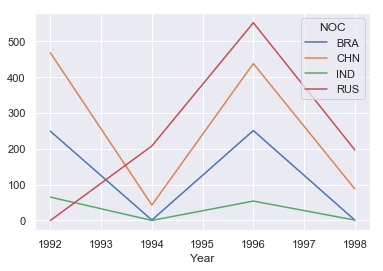

In [45]:
###before 2000 for participation
bric0 = df2[(df2.Year < 2000) & (df2.Year >= 1990)]
bric0['Year'] = pd.to_numeric(bric0['Year'])
ind_medals = bric0[(bric0.NOC == 'BRA') | (bric0.NOC == 'RUS') | (bric0.NOC == 'IND') | (bric0.NOC == 'CHN')].pivot_table(index=['Year'], columns='NOC', values='Name', aggfunc='count', dropna=True, fill_value=0)
print('Total Participation of BRIC Countries before 2000')
print(ind_medals.plot())
ind_medals

Total Medals of BRIC Countries before 2000
AxesSubplot(0.125,0.125;0.775x0.755)


NOC,BRA,CHN,IND,RUS
Year,,,,
1992,14,85,0,0
1994,0,3,0,36
1996,63,106,1,115
1998,0,14,0,52


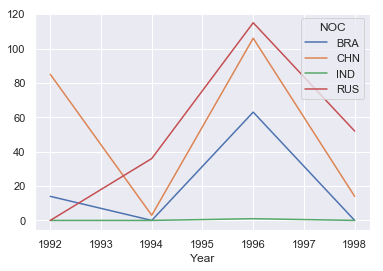

In [46]:
###before 2000 for medals 
medals = df2[(df2.Year < 2000) & (df2.Year >= 1990)]
bric0 = medals.dropna(subset=['Medal'])
bric0['Year'] = pd.to_numeric(bric0['Year'])
ind_medals = bric0[(bric0.NOC == 'BRA') | (bric0.NOC == 'RUS') | (bric0.NOC == 'IND') | (bric0.NOC == 'CHN')].pivot_table(index=['Year'], columns='NOC', values='Name', aggfunc='count', dropna=True, fill_value=0)
print('Total Medals of BRIC Countries before 2000')
print(ind_medals.plot())
ind_medals

Total Participation of BRIC Countries After 2000
AxesSubplot(0.125,0.125;0.775x0.755)


NOC,BRA,CHN,IND,RUS
Year,,,,
2000,236,414,70,602
2002,10,108,1,240
2004,318,518,81,593
2006,12,146,5,283
2008,338,730,67,600
2010,7,127,3,279
2012,306,479,95,549
2014,17,109,2,353
2016,583,499,130,406


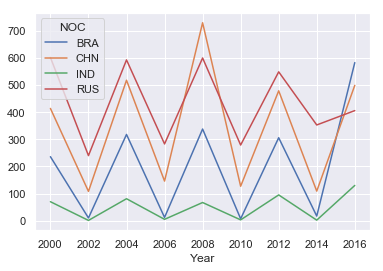

In [47]:
###after 2000 for participation
bric0 = df2[(df2.Year >= 2000)]
bric0['Year'] = pd.to_numeric(bric0['Year'])
ind_medals = bric0[(bric0.NOC == 'BRA') | (bric0.NOC == 'RUS') | (bric0.NOC == 'IND') | (bric0.NOC == 'CHN')].pivot_table(index=['Year'], columns='NOC', values='Name', aggfunc='count', dropna=True, fill_value=0)
print('Total Participation of BRIC Countries After 2000')
print(ind_medals.plot())
ind_medals

Total Medals of BRIC Countries after 2000
AxesSubplot(0.125,0.125;0.775x0.755)


NOC,BRA,CHN,IND,RUS
Year,,,,
2000,48,79,1,187
2002,0,16,0,38
2004,40,94,1,189
2006,0,13,0,41
2008,78,184,3,142
2010,0,19,0,25
2012,59,125,6,140
2014,0,12,0,68
2016,50,113,2,115


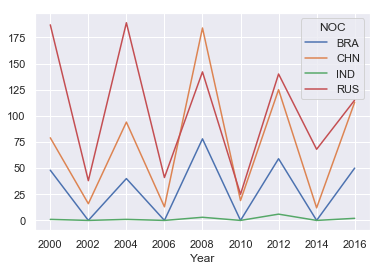

In [48]:
###after 2000 for medals 
medals = df2[(df2.Year >= 2000)]
bric0 = medals.dropna(subset=['Medal'])
bric0['Year'] = pd.to_numeric(bric0['Year'])
ind_medals = bric0[(bric0.NOC == 'BRA') | (bric0.NOC == 'RUS') | (bric0.NOC == 'IND') | (bric0.NOC == 'CHN')].pivot_table(index=['Year'], columns='NOC', values='Name', aggfunc='count', dropna=True, fill_value=0)
print('Total Medals of BRIC Countries after 2000')
print(ind_medals.plot())
ind_medals

From 2000 to 2016, the common sport of highest participating by BRIC countries is still Athletics. However we do see a much larger increase in participation in Olympic sports from 2127 to 7428, which is an increase in participation by 349%. There is also a large diversification of sports such as Russia participating in  Taekwondo,  India with Judo, China with Hockey, and Brazil with Trampolining. India still has the lowest participation out of all the BRIC countries, however, it has increased its participation after 2000.

In [49]:
#BRIC countries performance after 2000
bric = df2[df2.Year >= 2000]
bric['Medal'].fillna('Participation Only', inplace=True)
ind_medals = bric[(bric.NOC == 'BRA') | (bric.NOC == 'RUS') | (bric.NOC == 'IND') | (bric.NOC == 'CHN')].pivot_table(index=['NOC','Sport'], columns='Medal', values='Name', aggfunc='count', dropna=True, fill_value=0, margins=True)
ind_medals_sort = ind_medals.sort_values('All', ascending=False)
print('Top bric sports according to Olympic medals from 2000 to 2016:')
ind_medals_sort[['Gold','Silver','Bronze','Participation Only','All']]

#Russia rose to the challenge by improving on their athletics

# Also, Russia's gdp per capita grew more than china at the same time. This probably translates to the fact that they invested more than China in Olympics.

Top bric sports according to Olympic medals from 2000 to 2016:


Medal                          Gold  Silver  Bronze  Participation Only   All
NOC Sport                                                                    
All                             686     571     631                7428  9316
RUS Athletics                    26      39      28                 376   469
CHN Swimming                      8      16      17                 284   325
RUS Swimming                      1      11      12                 293   317
    Gymnastics                    7      30      26                 250   313
CHN Gymnastics                   36       6      19                 237   298
    Athletics                     6       2       9                 248   265
BRA Athletics                     2       5       5                 215   227
    Swimming                      1       1       7                 201   210
RUS Cross Country Skiing          9      11      10                 145   175
    Ice Hockey                    0       0      21                 149   170
BRA Football                     17      53      17                  67   154
    Gymnastics                    1       2       1                 149   153
RUS Biathlon                     15      10      12                 112   149
    Speed Skating                 1       3      11                 127   142
    Fencing                      25       6      16                  94   141
    Shooting                      4      11      10                 115   140
CHN Shooting                     15      10      14                  94   133
    Fencing                       6      17       5                 104   132
RUS Cycling                       4       5      10                 112   131
BRA Volleyball                   48      24      12                  36   120
RUS Volleyball                   12      34      24                  48   118
BRA Handball                      0       0       0                 114   114
CHN Basketball                    0       0       0                 108   108
IND Athletics                     0       0       0                 104   104
CHN Hockey                        0      16       0                  81    97
    Rowing                        4       4       3                  86    97
RUS Canoeing                      3       5      10                  77    95
CHN Short Track Speed Skating    12       9      14                  59    94
    Badminton                    26      10      13                  45    94
...                             ...     ...     ...                 ...   ...
BRA Taekwondo                     0       0       2                  11    13
CHN Alpine Skiing                 0       0       0                  12    12
    Triathlon                     0       0       0                  11    11
    Equestrianism                 0       0       0                  11    11
RUS Taekwondo                     0       2       2                   7    11
IND Weightlifting                 0       0       1                   9    10
    Rowing                        0       0       0                  10    10
BRA Weightlifting                 0       0       0                   9     9
    Wrestling                     0       0       0                   8     8
CHN Ski Jumping                   0       0       0                   8     8
BRA Cross Country Skiing          0       0       0                   8     8
    Modern Pentathlon             0       0       1                   5     6
IND Judo                          0       0       0                   6     6
    Alpine Skiing                 0       0       0                   5     5
    Gymnastics                    0       0       0                   5     5
CHN Golf                          0       0       1                   3     4
IND Cross Country Skiing          0       0       0                   3     3
BRA Snowboarding                  0       0       0                   3     3
IND Golf              

### Conclusion

1. USA Female Life Expectancy and USA Gold Medals
    
    Looking at strictly USA data, we did find that as female life expectancy increase there is a correlation with an increase chance of winning a Gold medal for a US female athlete. If the expected life expectancy for US female is above 77.7 years of age we should expect a 20.58% chance of winning gold, versus female life expectancy below 77.7 years of age would result in a 13.68% chance of winning Gold medal.


2. USA and Russia/Soviet Union Olympic Medal success during and after Cold War
    
    Since the start of modern Olympics, United States has the most success winning the most amount of Gold, Bronze, and Silver Medals in the Olympics. The Soviet Union or Russia (Russia made up most of the Soviet Union) was the only nation with athletes that gave United States athletes a run for their money. USA has won a total of 3971 Olympic Medals and Russia, second to USA,  has won a total of 3651 Olympic medals. Prior to the Soviet Union breaking up, they were much more successful than the United States at winning Olympic Medals from the 1956 to 1988. 
    
    We believe there is a correlation between a country's GDP per capita and Olympic success. For the United States there was an uptrend in medals won as the GDP-capita increased from 1950s to 2016. Russia on the other hand saw a dramatic decrease in Olympic medal wins shortly after the Cold War, and at the same time we saw an immediate downtrend in GDP per capita. In 1999, Russia experienced an exponential uptrend in GDP per capita and during that same time we saw a dramatic increase in Olympic medals won from 115 to 187 medals in the 1996 Olympics to 2000 Olympics. Then after 2013 its GDP drops off again due to the downfall of oil prices in 2014 and economic sanctions from Ukranian crisis; which during this time we see a drop to 115 Olympic Medals won in 2016. Observing Russia's success following their uptrends and downtrends in GDP is a great indication that uptrends in GDP is a good indication of success in the Olympics. 
    
    
3. BRIC countries Olympic success before and after 2000.

    Looking at BRIC success in the Olympics before and after 2000 was another way to confirm the correlation between GDP growth and Olympic success. BRIC became popular at the start of the 21st Century as these countries were experiencing year-to-year growth in their economy. A good example is China, who saw an average of 555 GDP per capita from 1990 to 1999 and its GDP grew 728% to 4041 GDP per capita from 2000 to 2016. As all BRIC countries average GDP per capita grew at least 200% between the two time frames, we saw a dramatic increase in Olympic medal wins. BRIC countries won 489 Olympic medals from 1990 to 1999, which dramatically increased to 1888 Olympic medals from 2000 to 2016; the average medals won per Olympic year between the two time periods increased from 122.25 to 209.78. What's interesting is that India went from winning one medal in the first period to winning 13 medals in the second period. It's clear that India is not as invested as the other BRIC countries in the Olympics, however it could be because India is the poorest country out of all the other BRIC countries.
    Another correlation we saw from BRIC data is that an increase in participation likely results in an increase in Olympic success. During the same periods where BRIC countries saw an increase in medals won from 489 to 1888, the participation of BRIC athletes in Olympic events increased from 2127 to 7428. 
    
    
    